In [4]:
import matplotlib.pyplot as plt
import numpy as np
import fsps
from prospect.models import priors, transforms, templates
import prospect.io.read_results as pread
import pandas as pd
import sys, glob, tqdm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
matplotlib.rcParams.update({
    "savefig.facecolor": "w",
    "figure.facecolor" : 'w',
    "text.color": "k",
    "legend.fontsize" : 20,
    "font.size" : 35,
    "axes.edgecolor": "k",
    "axes.labelcolor": "k",
    "xtick.color": "k",
    "ytick.color": "k",
    "xtick.labelsize" : 30,
    "ytick.labelsize" : 30,
    "font.family": "STIXGeneral",
    "mathtext.fontset" : "cm"
})

In [39]:
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1,sfh=0, logzsol=-1.2, add_dust_emission=False, dust2=0)

In [40]:
wav, spec3 = sp.get_spectrum(tage=0.1)
wav, spec01 = sp.get_spectrum(tage=0.01)
wav, spec5 = sp.get_spectrum(tage=1)
wav, spec11 = sp.get_spectrum(tage=10)

#wav, spec = sp.get_spectrum(tage=10.5)

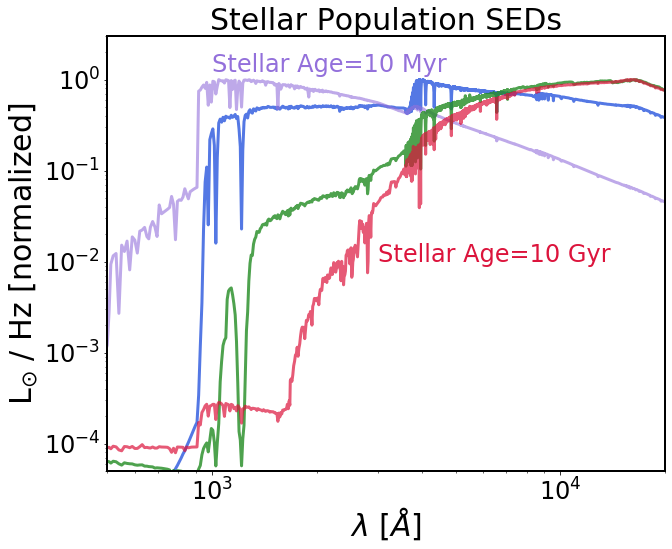

In [43]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor')
#plt.loglog(wav, spec/np.max(spec), color='mediumseagreen', alpha=0.9, lw=4)
plt.loglog(wav, spec3/np.max(spec3), color='royalblue', alpha=0.9, lw=3)
plt.loglog(wav, spec01/np.max(spec01), color='mediumpurple', alpha=0.6, lw=3)
plt.loglog(wav, spec5/np.max(spec5), color='forestgreen', alpha=0.8, lw=3)
plt.loglog(wav, spec11/np.max(spec11), color='crimson', alpha=0.7, lw=3)
plt.ylim([5e-5, 3])
plt.xlim([5e2, 2e4])

plt.ylabel('L$_{\odot}$ / Hz [normalized]', fontsize=30)
plt.xlabel('$\lambda$ [$\AA$]', fontsize=30)

plt.annotate('Stellar Age=10 Myr', xy=(1e3, 1.2), color='mediumpurple', fontsize=24)
plt.annotate('Stellar Age=10 Gyr', xy=(3e3, 1e-2), color='crimson', fontsize=24)

plt.title('Stellar Population SEDs', fontsize=30)

plt.savefig('/Users/sidneylower/FINESST/stellar_SEDs.png', dpi=300, bbox_inches='tight')

In [7]:
tage = 13.7
sfr_start = 0+0.01
times = np.linspace(0, tage, 1000)
mass = 1e10

In [12]:
burst = []
delay_exp = []
const = []
for i in times:
    if i < sfr_start:
        delay_exp.append(0)
        const.append(mass/(tage*1e9))
    else:
        delay_exp.append((mass/(tage*1e9)) * (i - sfr_start) * np.exp((i - sfr_start)/-1))
        const.append(mass/(tage*1e9))
        
        
b_times = np.linspace(0, tage, 30)    
        
for i in b_times:
    if i < 0.8:
        burst.append(0)
    else:
        burst.append((mass/(10.5*1e9)) * (i - 1.2) * np.exp((i - 1.2) / -1))
burst_time = 7
burst_amt = 0.1

time = np.append(b_times, burst_time)
time.sort()
idx = np.where(time == burst_time)[0][0]
norm_burst = (burst_amt * mass) / (1e10)                                                  
burst = np.insert(burst, idx, norm_burst)


In [17]:
nonpara = [0.1,   0.3,  0.18, 0.4,  0.3,  0.55]
agelims = np.linspace(0, tage, len(nonpara)+1)

In [9]:
true_time = np.arange(0, 14.2, 0.1)
gal=100
caesar_sfh_file = np.load('/Volumes/ufrc/narayanan/s.lower/simSEDs/snap305_sfhs/sfh_snap305_raised_lowerlim_'+str(gal)+'.npz', allow_pickle=True)
caesar_sfh = np.asarray(caesar_sfh_file['data'][()]['SFR'])[::-1]


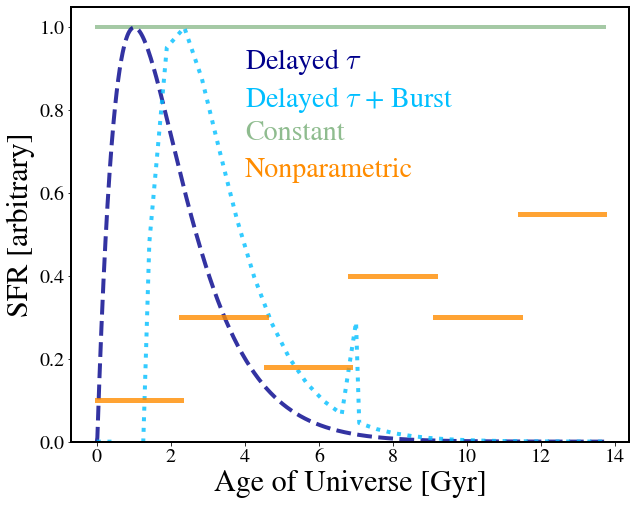

In [27]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor')
#plt.plot(true_time, caesar_sfh/np.max(caesar_sfh), lw=2, color='black')
plt.plot(times, const/np.max(const), color='darkseagreen',  lw=4, alpha=0.8)
plt.plot(times, delay_exp/np.max(delay_exp), color='darkblue',ls='--', lw=4, alpha=0.8)
plt.plot(time, burst/np.max(burst), color='deepskyblue', ls=':',lw=4, alpha=0.8)
for i in range(len(nonpara)):
    plt.plot([agelims[i], agelims[i+1]], [nonpara[i], nonpara[i]], color='darkorange', alpha=0.8, lw=5)
plt.ylabel('SFR [arbitrary]', fontsize=30)
plt.xlabel('Age of Universe [Gyr]', fontsize=30)
plt.ylim([0., 1.05])
plt.annotate(r'Delayed $\tau$', xy=(4, 0.9), color='darkblue', fontsize=28)
plt.annotate(r'Delayed $\tau$ + Burst', xy=(4, 0.81), color='deepskyblue', fontsize=28)
plt.annotate(r'Constant', xy=(4, 0.73), color='darkseagreen', fontsize=28)
#plt.annotate(r'Cosmological Simulation', xy=(4, 0.64), color='black', fontsize=28)
plt.annotate(r'Nonparametric', xy=(4, 0.64), color='darkorange', fontsize=28)
#plt.title('Star Formation History', fontsize=30)
plt.savefig('/Users/sidneylower/Documents/draft plots//sfh.png', dpi=300, bbox_inches='tight')

In [11]:
#global attn curve params
dd63=6300.00
lamv=3000.0
dlam=350.0
lamuvb=2175.0

In [12]:
def Cardelli_fspsparam(lam, dust2, mwr, uvb):
    x = 1e4 / lam
    y = x - 1.82
    a = np.empty(len(x))
    b = np.empty(len(x))
    attn_curve = np.empty(len(x))
    for i in range(len(x)):
        
        
        
        if x[i] > 12.: #far far UV?
            a[i] = -1.073 - 0.628*(12.-8.)+0.137*(12.-8.)**2-0.070*(12.-8.)**3
            b[i] = (13.67+4.257*(12.-8.)-0.42*(12.-8.)**2+0.374*(12.-8.)**3) / mwr
        elif x[i] > 8.: #far UV
            a[i] = -1.073-0.628*(x[i]-8.)+0.137*(x[i]-8.)**2-0.070*(x[i]-8.)**3
            b[i] = (13.67+4.257*(x[i]-8.)-0.42*(x[i]-8.)**2+0.374*(x[i]-8.)**3) / mwr
        elif x[i] > 5.9: #mid-UV
            f_a = -0.04473*(x[i]-5.9)**2-0.009779*(x[i]-5.9)**3
            f_b =  0.2130*(x[i]-5.9)**2+0.1207*(x[i]-5.9)**3
            a[i]  = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i]  = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb + f_b) / mwr
             
        elif x[i] > 3.3: #near UV
            f_a = (3.3/x[i])**6.*(-0.037 + 0.0469*uvb - (0.601*uvb / mwr) + 0.542/mwr)
            a[i] = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i] = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb ) / mwr
            
        elif x[i] > 1.1: #optical - NIR   
            a[i] = 1 + 0.177*y[i] - 0.50477*y[i]**2 - 0.0243*y[i]**3 + 0.721*y[i]**4 + 0.0198*y[i]**5 - 0.7753*y[i]**6 + 0.33*y[i]**7
            b[i] = (1.4134*y[i] + 2.283*y[i]**2 + 1.072*y[i]**3 - 5.385*y[i]**4 - 0.6225*y[i]**5 + 5.303*y[i]**6 - 2.09*y[i]**7) / mwr
        elif x[i] > 0.1:
            a[i] = 0.574*x[i]**1.61
            b[i] = (-0.527*x[i]**1.61) / mwr
    
    
    for i in range(len(x)):
        attn_curve[i] = (a[i] + b[i])
        
    
    return attn_curve*dust2

In [13]:
def Kriek_Conroy(lam, dust2, dust_index): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = 0.85 - (1.9 * dust_index)  #KC13 Eqn 3                                                                                                           

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve

In [14]:
def Calzetti(lam, dust2):
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = cal00/0.44/4.05
    
    attn_curve = cal00 * dust2
    
    return attn_curve

In [15]:
def find_nearest(array,value):
    idx = (np.abs(np.array(array)-value)).argmin()
    return idx

In [16]:
wave = np.linspace(100, 15000, 10000)
wav5500 = np.full(len(wave), 3000)

In [17]:
cal = Calzetti(wave, 2) / Calzetti(wav5500, 2)
kc = Kriek_Conroy(wave, 2, -0.7) / Kriek_Conroy(wav5500, 2, -0.7)

In [18]:
card = Cardelli_fspsparam(wave, 2, 3.1, 1) / Cardelli_fspsparam(wav5500, 2, 3.1, 1)

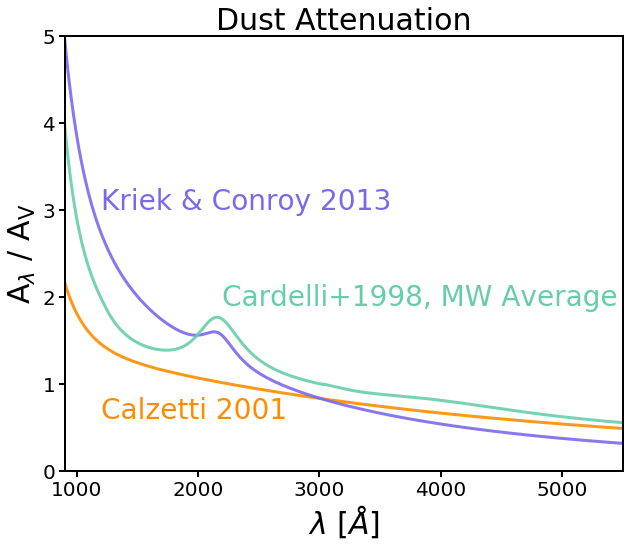

In [48]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', width=2, length=6, labelsize=20)
plt.tick_params(axis='both', which='minor', width=2, length=4)

plt.plot(wave, cal, color='darkorange', lw=3, alpha=0.9, label='Calzetti+2001')
plt.plot(wave, kc, color='mediumslateblue', lw=3, alpha=0.9, label='Kriek & Conroy 2013')
plt.plot(wave, card, color='mediumaquamarine', lw=3, alpha=0.9)
plt.xlim([900, 5500])
plt.xlabel('$\lambda$ [$\AA$]', fontsize=30)
plt.ylim([0., 5])
plt.ylabel('A$_{\lambda}$ / A$_{\mathrm{V}}$', fontsize=30)
plt.title('Dust Attenuation', fontsize=30)

plt.annotate('Kriek & Conroy 2013', fontsize=28, xy=(1200, 3), color='mediumslateblue')
plt.annotate('Calzetti 2001', fontsize=28, xy=(1200, 0.6), color='darkorange')
plt.annotate('Cardelli+1998, MW Average', fontsize=28, xy=(2200, 1.9), color='mediumaquamarine')

plt.savefig('/Users/sidneylower/FINESST/atten_curve.png', dpi=300, bbox_inches='tight')

In [2]:
true_sfr = pd.read_pickle('/Users/sidneylower/ml_scripts/ml_props.pkl')['SFR']
true_sfr = np.log10(true_sfr)

In [3]:
pred_sfr = pd.read_pickle('/Users/sidneylower/ml_scripts/logsfr_pred_7zs_fancy.pkl')
pred_sfrs = np.log10(10**(np.asarray(pred_sfr['logSFR_pred'][pred_sfr['z'] == 0])) - 1 )


/Users/sidneylower/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [4]:
np.shape(np.asarray(pred_sfrs) / np.asarray(true_sfr))

(1638,)

In [7]:
sed_sfrs = pd.read_pickle('/Users/sidneylower/Documents/prosp_final_plots/output files/dir_updated_12102019.pkl')
sed_sfr = (np.array(list(dict.fromkeys(sed_sfrs['SFR'])))[::11] + np.array(list(dict.fromkeys(sed_sfrs['SFR']))[1::11])) / 2

galaxies_in_sed = list(dict.fromkeys(sed_sfrs.index.get_level_values('Galaxy')))
galaxies_in_sed = [int(x) for x in galaxies_in_sed]


tau_sfrs = pd.read_pickle('/Users/sidneylower/Documents/prosp_final_plots/output files/tau_output.pkl')
tau_sfr = tau_sfrs['SFR'][275::276]
galaxies_in_tau = list(dict.fromkeys(tau_sfrs.index.get_level_values('Galaxy')))
galaxies_in_tau = [int(x) for x in galaxies_in_tau]

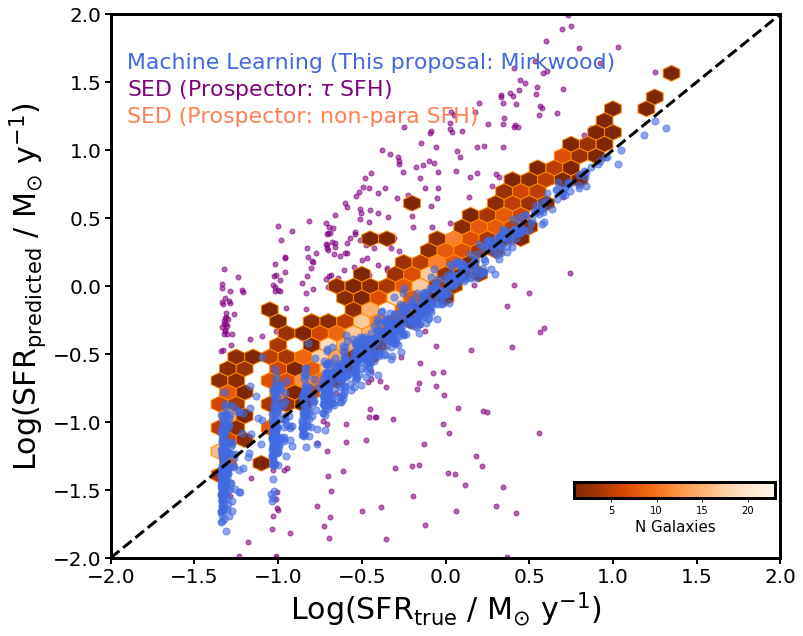

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('axes', linewidth=3)
ax.tick_params(axis='both', which='major', width=2, length=6, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2, length=4)

#plt.contour(counts.transpose(),levels=np.linspace(1.0, 27.0, 2), extent=[7, 13, 7, 13], linewidths=2, colors='blue', alpha=0.6)
    

a = plt.hexbin(true_sfr[galaxies_in_sed], np.log10(sed_sfr), gridsize=40, extent=(-2, 2, -2, 2), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r)    
cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0.,0.1,1,1), bbox_transform=ax.transAxes) 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)

ax.annotate('SED (Prospector: non-para SFH)', xy=(-1.9, 1.2), fontsize=22, color='coral')
ax.annotate('Machine Learning (This proposal: Mirkwood)', xy=(-1.9, 1.6), fontsize=22, color='royalblue')
ax.annotate(r'SED (Prospector: $\tau$ SFH)', xy=(-1.9, 1.4), fontsize=22, color='purple')
ax.scatter(true_sfr, pred_sfrs, color='royalblue', marker='.', s=200, alpha=0.6, label='Machine Learning')
ax.scatter(true_sfr[galaxies_in_tau], np.log10(tau_sfr), color='purple', zorder=0,s=100, marker='.', alpha=0.6, label='Prospector SED')
ax.plot([-2, 2], [-2, 2], color='black', ls='--', lw=3, zorder=10)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.set_ylabel('Log(SFR$_{\mathrm{predicted}}$ / M$_{\odot}$ y$^{-1}$)', fontsize=30)
ax.set_xlabel('Log(SFR$_{\mathrm{true}}$ / M$_{\odot}$ y$^{-1}$)', fontsize=30)

#plt.legend(loc='best', fontsize=24)

plt.savefig('/Users/sidneylower/ml_scripts/sfr_1to1_comp.png', dpi=300, bbox_inches='tight')

In [5]:
dat = pd.read_pickle('/Users/sidneylower/ml_scripts/ml_props.pkl')

In [11]:
true_met = dat['Metallicity']
pred_met_allz = pd.read_pickle('/Users/sidneylower/Downloads/met_pred_7zs_fancy_5cv.pkl')
pred_met = pred_met_allz['Metallicity_pred'][pred_met_allz['z'] == 0]
sed_met = sed_masses.loc[(slice(None), list(dict.fromkeys(sed_masses.index.get_level_values('Time')))[0]), 'Metallicity']
tau_met = tau_sfrs.loc[(slice(None), list(dict.fromkeys(tau_sfrs.index.get_level_values('Time [Gyr]')))[0]), 'Metallicity']





In [12]:
solar = 0.0196

In [13]:
logz_true = np.log10(np.asarray(true_met) / solar)
logz_pred = np.log10(np.asarray(pred_met) / solar)
logz_tau = np.log10(np.asarray(tau_met) / solar)

/Users/sidneylower/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


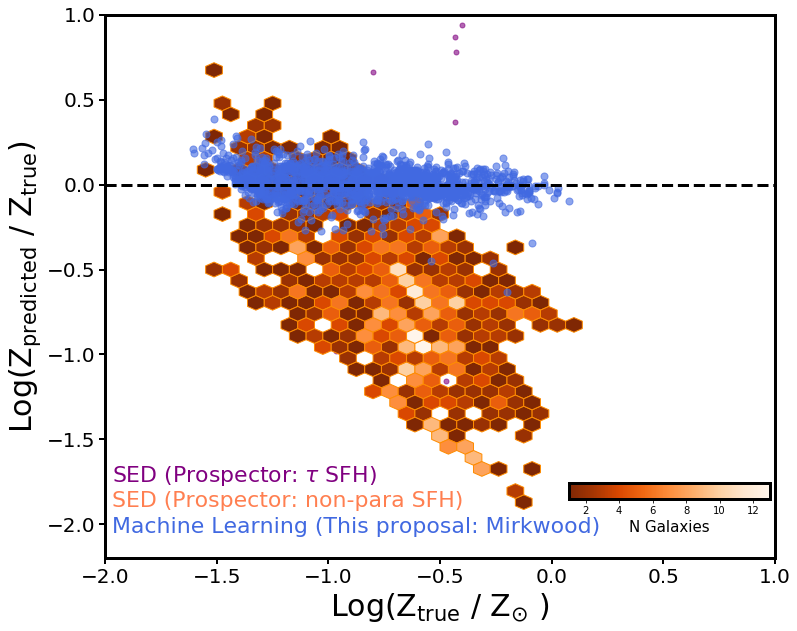

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('axes', linewidth=3)
ax.tick_params(axis='both', which='major', width=2, length=6, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2, length=4)

#plt.contour(counts.transpose(),levels=np.linspace(1.0, 27.0, 2), extent=[7, 13, 7, 13], linewidths=2, colors='blue', alpha=0.6)
    

a = plt.hexbin(logz_true[galaxies_in_sed], np.log10(10**sed_met / 10**logz_true[galaxies_in_sed]), gridsize=40, extent=(-2, 1, -2, 1), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r)    
cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0.,0.1,1,1), bbox_transform=ax.transAxes) 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)

ax.annotate('SED (Prospector: non-para SFH)', xy=(-1.97, -1.9), fontsize=22, color='coral')
ax.annotate('Machine Learning (This proposal: Mirkwood)', xy=(-1.97, -2.05), fontsize=22, color='royalblue')
ax.annotate(r'SED (Prospector: $\tau$ SFH)', xy=(-1.97, -1.75), fontsize=22, color='purple')
ax.scatter(logz_true, np.log10(10**logz_pred / 10**logz_true), color='royalblue', marker='.', s=200, alpha=0.6, label='Machine Learning')
ax.scatter(logz_true[galaxies_in_tau], np.log10(10**logz_tau / 10**logz_true[galaxies_in_tau]), color='purple', zorder=0,s=100, marker='.', alpha=0.6, label='Prospector SED')
ax.plot([-2, 2], [0, 0], color='black', ls='--', lw=3, zorder=10)
ax.set_xlim([-2, 1])
ax.set_ylim([-2.2, 1])

ax.set_ylabel('Log(Z$_{\mathrm{predicted}}$ / Z$_{\mathrm{true}}$)', fontsize=30)
ax.set_xlabel('Log(Z$_{\mathrm{true}}$ / Z$_{\odot}$ )', fontsize=30)

#plt.legend(loc='best', fontsize=24)

plt.savefig('/Users/sidneylower/ml_scripts/met_ratio_comp.png', dpi=300, bbox_inches='tight')

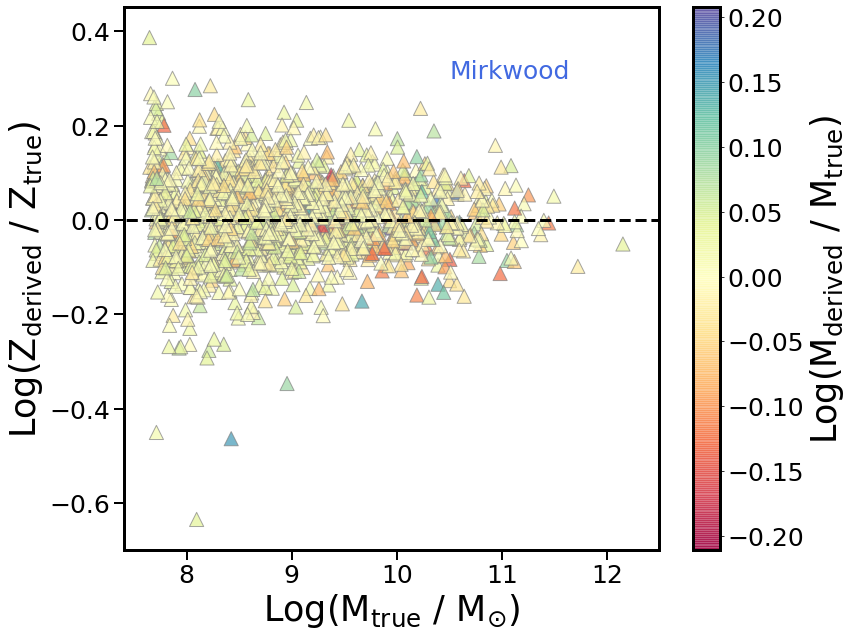

In [25]:
plt.figure(figsize=(12, 10))
plt.rc('axes', linewidth=3)
plt.tick_params(axis='both', which='major', width=2, length=10, labelsize=25)
plt.tick_params(axis='both', which='minor', width=2, length=4)
normalize = matplotlib.colors.Normalize(vmin=np.log10(ratio_ml).min(), vmax=np.log10(ratio_ml).max())

plt.scatter(true_mass, np.log10(10**logz_pred / 10**logz_true), c=np.log10(ratio_ml), cmap='Spectral', norm=normalize, edgecolor='gray', marker='^', s=200, alpha=0.7, label='Machine Learning')
plt.set_cmap('Spectral')
cbar = plt.colorbar()
cbar.set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=35)
cbar.ax.tick_params(labelsize=25)
plt.plot([5, 14],[0., 0.] ,color='black', lw=3, ls='--')
plt.ylabel('Log(Z$_\mathrm{derived}$ / Z$_\mathrm{true}$)', fontsize=35)
plt.xlabel('Log(M$_\mathrm{true}$ / M$_{\odot}$)', fontsize=35)
plt.xlim([7.4, 12.5])
plt.annotate('Mirkwood', xy=(10.5, 0.3), fontsize=25, color='royalblue')

plt.savefig('/Users/sidneylower/ml_scripts/met_offset_mass.png', dpi=300, bbox_inches='tight')

In [2]:
true_mass = pd.read_pickle('/Users/sidneylower/ml_scripts/ml_props.pkl')['Mstar']
true_mass = np.log10(np.asarray(true_mass) / 1.989e33)

In [3]:
pred_mass = pd.read_pickle('/Users/sidneylower/ml_scripts/mass_pred_fancy.pkl')
pred_mass = np.log10(np.asarray(pred_mass) / 1.989e33)

In [4]:
sed_masses = pd.read_pickle('/Users/sidneylower/Documents/prosp_final_plots/output files/dir_updated_12102019.pkl')
sed_mass = sed_masses.loc[(slice(None), list(dict.fromkeys(sed_masses.index.get_level_values('Time')))[0]), 'Derived Stellar Mass']
trues_mass = sed_masses.loc[(slice(None), list(dict.fromkeys(sed_masses.index.get_level_values('Time')))[0]), 'Intrinsic Stellar Mass']
trus_mass = np.log10(np.asarray(trues_mass))
sed_mass = np.log10(np.asarray(sed_mass))

In [8]:
tau_mass = tau_sfrs.loc[(slice(None), list(dict.fromkeys(tau_sfrs.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
tau_trues_mass = tau_sfrs.loc[(slice(None), list(dict.fromkeys(tau_sfrs.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']
tau_trus_mass = np.log10(np.asarray(tau_trues_mass))
tau_mass = np.log10(np.asarray(tau_mass))

In [16]:
ratio_ml = (10**pred_mass / 10**true_mass)
ratio_sed = (10**sed_mass) / (10**trus_mass)
ratio_tau = (10**tau_mass) / (10**tau_trus_mass)

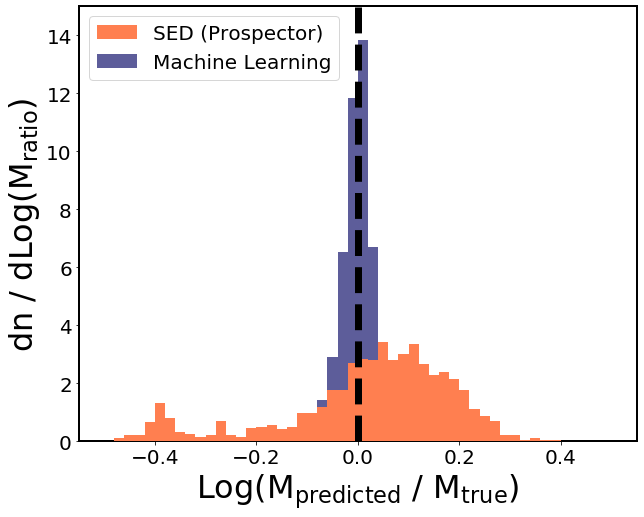

In [186]:
fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('axes', linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor')
_, _, _ = plt.hist(np.log10(ratio_sed), bins=50, range=(-0.5, 0.5), color='coral',lw=5, density=True, zorder=3, label='SED (Prospector)')

_, _, _ = plt.hist(np.log10(ratio_ml), bins=50,  color='midnightblue', range=(-0.5, 0.5), alpha=0.7, lw=5, density=True, zorder=0,label='Machine Learning')

#plt.plot([np.log10(d_med), np.log10(d_med)], [0, 10], lw=2, ls='--', color='darkorange', alpha=0.4)
#plt.plot([np.log10(b_med), np.log10(b_med)], [0, 10], lw=2, ls='--', color='deepskyblue', alpha=0.6, zorder=0)

plt.plot([0.0, 0.0], [0, 15], lw=7, ls='--', zorder=11, color='black')
plt.xlabel('Log(M$_\mathrm{predicted}$ / M$_\mathrm{true}$)', fontsize=32)
plt.ylabel('dn / dLog(M$_\mathrm{ratio}$)', fontsize=32)
plt.ylim([0, 15])


plt.legend(loc='upper left', fontsize=20)
plt.savefig('/Users/sidneylower/FINESST//Mhist.png', dpi=300, bbox_inches='tight',transparent=True)

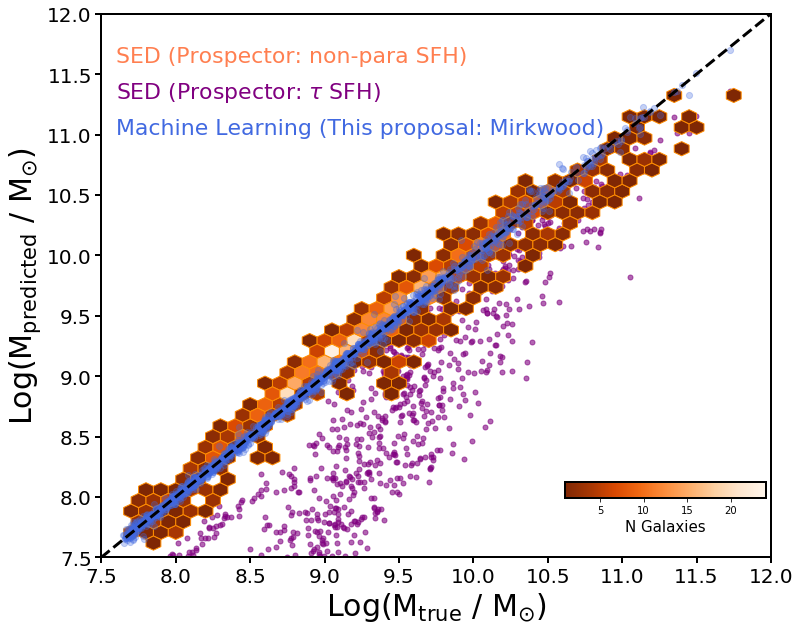

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('axes', linewidth=2)
ax.tick_params(axis='both', which='major', width=2, length=6, labelsize=20)
ax.tick_params(axis='both', which='minor', width=2, length=4)

#plt.contour(counts.transpose(),levels=np.linspace(1.0, 27.0, 2), extent=[7, 13, 7, 13], linewidths=2, colors='blue', alpha=0.6)
    

a = plt.hexbin(trus_mass, sed_mass, gridsize=60, extent=(7, 13, 7, 13), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r)    
#cbaxes = inset_axes(ax1, width="30%", height="3%", loc='upper left') 
#cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
#cbar_a.set_label('N Galaxies', fontsize=15)


cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0.,0.1,1,1), bbox_transform=ax.transAxes) 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=15)
ax.annotate('SED (Prospector: non-para SFH)', xy=(7.6, 11.6), fontsize=22, color='coral')
ax.annotate('Machine Learning (This proposal: Mirkwood)', xy=(7.6, 11.), fontsize=22, color='royalblue')
ax.annotate(r'SED (Prospector: $\tau$ SFH)', xy=(7.6, 11.3), fontsize=22, color='purple')

ax.scatter(true_mass, pred_mass, color='royalblue', marker='.', s=150, alpha=0.3, label='Machine Learning')
ax.scatter(tau_trus_mass, tau_mass, color='purple', zorder=0,s=100, marker='.', alpha=0.6, label='Prospector SED')
ax.plot([7, 13], [7, 13], color='black', ls='--', lw=3, zorder=10)
ax.set_xlim([7.5, 12])
ax.set_ylim([7.5, 12])

ax.set_ylabel('Log(M$_{\mathrm{predicted}}$ / M$_{\odot}$)', fontsize=30)
ax.set_xlabel('Log(M$_{\mathrm{true}}$ / M$_{\odot}$)', fontsize=30)

#plt.legend(loc='best', fontsize=24)

plt.savefig('/Users/sidneylower/ml_scripts/mass_1to1_comp.png', dpi=300, bbox_inches='tight')

/Users/sidneylower/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


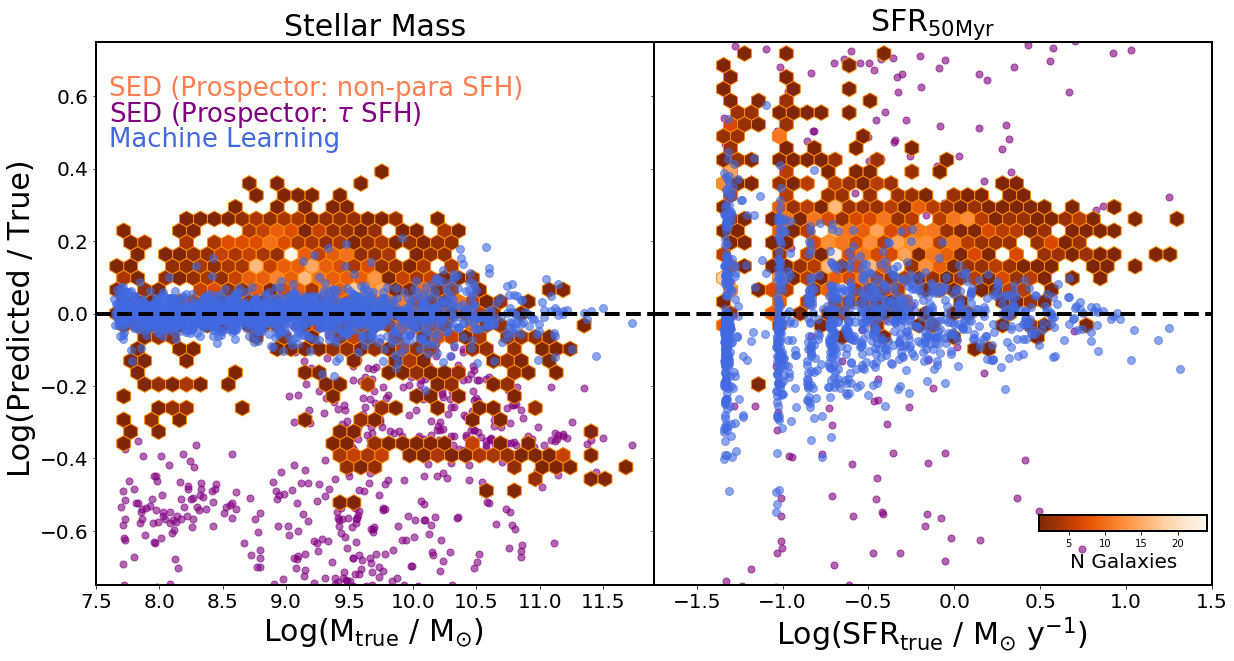

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('axes', linewidth=2)

ax1.set_xlim([7.5, 11.9])
ax2.set_xlim([-1.75, 1.5])
ax1.plot([7.5, 12], [0,0], color='black', ls='--', lw=4, zorder=25)
ax2.plot([-1.75, 1.5], [0,0], color='black', ls='--', lw=4, zorder=25)
ax1.set_xlabel('Log(M$_\mathrm{true}$ / M$_{\odot}$) ', fontsize=30)
ax2.set_xlabel('Log(SFR$_{\mathrm{true}}$ / M$_{\odot}$ y$^{-1}$) ', fontsize=30)
ax1.set_ylabel('Log(Predicted / True) ', fontsize=30)
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor')
    ax.set_ylim([-0.75, 0.75])

ax1.scatter(tau_trus_mass, np.log10(10**tau_mass / 10**tau_trus_mass), color='purple', zorder=0,s=200, marker='.', alpha=0.6)
ax2.scatter(true_sfr[galaxies_in_tau], np.log10(tau_sfr / 10**np.asarray(true_sfr[galaxies_in_tau])), color='purple', zorder=0,s=200, marker='.', alpha=0.6)

ax1.hexbin(trus_mass, np.log10(10**sed_mass / 10**trus_mass), gridsize=40, extent=(7.5, 11.9, -0.75, 0.75), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r)    
ax2.hexbin(true_sfr[galaxies_in_sed], np.log10(sed_sfr / 10**true_sfr[galaxies_in_sed]), gridsize=40, extent=(-1.75, 1.5, -0.75, 0.75), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r)    

ax1.scatter(true_mass, np.log10(10**pred_mass / 10**true_mass), color='royalblue', marker='.', s=250, alpha=0.6, label='Machine Learning')
ax2.scatter(true_sfr, np.log10(10**np.asarray(pred_sfrs) / 10**np.asarray(true_sfr)), color='royalblue', marker='.', s=250, alpha=0.6, label='Machine Learning')

cbaxes = inset_axes(ax2, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0.,0.09,1,1), bbox_transform=ax.transAxes) 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=20)

ax1.annotate('SED (Prospector: non-para SFH)', xy=(7.6, .6), fontsize=26, color='coral')
ax1.annotate('Machine Learning', xy=(7.6, 0.46), fontsize=26, color='royalblue')
ax1.annotate(r'SED (Prospector: $\tau$ SFH)', xy=(7.6, 0.53), fontsize=26, color='purple')

ax1.set_title('Stellar Mass', fontsize=30)
ax2.set_title('SFR$_{50 \mathrm{Myr}}$', fontsize=30)

plt.savefig('/Users/sidneylower/ml_scripts/both_ratio.png', dpi=300, bbox_inches='tight')

In [94]:
np.shape(np.log10(pred_sfrs / 10**true_sfr))

(1669,)

In [111]:
np.shape(10**pred_sfrs)

(1638,)

In [96]:
np.shape(10**true_sfr)

(1638,)

In [112]:
np.shape(np.log10(10**pred_sfrs / 10**true_sfr))

(1669,)

In [117]:
np.shape(np.log10(10**pred_mass / 10**true_mass))

(1638,)

In [118]:
np.log10(10**pred_sfrs / 10**true_sfr)

0       9.299925
1       9.195975
2            NaN
3       0.028199
4       8.039403
          ...   
1690         NaN
1705         NaN
1712         NaN
1732         NaN
1836         NaN
Length: 1669, dtype: float64

In [63]:
test = '/Users/sidneylower/Desktop/test/test1.txt'

In [65]:
import sys, os

In [68]:
test_file = os.path.splitext(os.path.basename(test))[0]

In [69]:
test_file

'test1'

In [74]:
test = '/Users/sidneylower/snap305.galaxy100.rtout.sed'
test1 = '/Users/sidneylower/snap305.galaxy010.rtout.sed'
sed_files = [test, test1]

In [78]:
galaxy_num = str(100)

In [79]:
sedfile = [f for f in sed_files if 'galaxy'+galaxy_num+'.rtout.sed' in f]

In [80]:
sedfile

['/Users/sidneylower/snap305.galaxy100.rtout.sed']

In [2]:
from sedpy.observate import load_filters

In [3]:
galex = ['galex_FUV', 'galex_NUV']
hst_wfc3_uv  = ['wfc3_uvis_f275w', 'wfc3_uvis_f336w', 'wfc3_uvis_f475w','wfc3_uvis_f555w', 'wfc3_uvis_f606w', 'wfc3_uvis_f814w']
hst_wfc3_ir = ['wfc3_ir_f105w', 'wfc3_ir_f110w', 'wfc3_ir_f125w', 'wfc3_ir_f140w', 'wfc3_ir_f160w']
panstarrs_ps1 = ['panstarrs_ps1_g', 'panstarrs_ps1_r', 'panstarrs_ps1_i', 'panstarrs_ps1_z', 'panstarrs_ps1_y']
gemini_gmos = ['gemini_gmos_u', 'gemini_gmos_g', 'gemini_gmos_r', 'gemini_gmos_i', 'gemini_gmos_z', 'gemini_gmos_y']
sdss = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
keck_lris = ['keck_lris_B', 'keck_lris_g', 'keck_lris_V', 'keck_lris_R', 'keck_lris_Rs']
keck_nirc2 = ['keck_nirc2_J', 'keck_nirc2_H']
hst_acs_wfc = ['acs_wfc_f435w', 'acs_wfc_f475w', 'acs_wfc_f555w', 'acs_wfc_f606w', 'acs_wfc_f625w', 'acs_wfc_f775w', 'acs_wfc_f814w']
#wise = ['wise_w1', 'wise_w2', 'wise_w3', 'wise_w4']                                                                                           
spitzer_mips = ['spitzer_mips_24', 'spitzer_mips_70', 'spitzer_mips_160']
#spitzer_irac = ['spitzer_irac_ch1', 'spitzer_irac_ch2', 'spitzer_irac_ch3', 'spitzer_irac_ch4']                                               
#jwst_miri = ['jwst_f5602', 'jwst_f770w', 'jwst_f1000w', 'jwst_f1130w', 'jwst_f1280w', 'jwst_f1500w', 'jwst_f1800w', 'jwst_f2100w', 'jwst_f2550w']                                                                                                                                           
jwst_nircam = ['jwst_f070w', 'jwst_f090w', 'jwst_f115w', 'jwst_f140m', 'jwst_f150w', 'jwst_f162m', 'jwst_f182m', 'jwst_f200w', 'jwst_f210m', 
               'jwst_f250m','jwst_f277w','jwst_f300m','jwst_f335m', 'jwst_f356w', 'jwst_f360m']

herschel_pacs = ['herschel_pacs_70', 'herschel_pacs_100', 'herschel_pacs_160']
herschel_spire = ['herschel_spire_250', 'herschel_spire_350', 'herschel_spire_500']

lsst = ['lsst_u', 'lsst_g', 'lsst_r', 'lsst_i', 'lsst_z', 'lsst_y']
scuba = ['scuba_450', 'scuba_850']

In [4]:
filternames = (galex + hst_wfc3_uv + lsst + sdss + panstarrs_ps1 + gemini_gmos + keck_lris + hst_wfc3_ir + hst_acs_wfc + keck_nirc2 +
               jwst_nircam + spitzer_mips + herschel_pacs + herschel_spire + scuba)

In [15]:
filters = load_filters(filternames)

In [7]:
waves = [x.wave_mean for x in filters]

In [13]:
filter_sorted = [x for _,x in sorted(zip(waves,filters))]

In [18]:
filters[0].name

'galex_FUV'

In [198]:
sys.path.append('/Users/sidneylower/ml_demo/')
from run_prosp_JWST import build_model, build_sps, build_obs
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import astropy.units as u
from astropy.cosmology import Planck15
from glob import glob

ModuleNotFoundError: No module named 'hyperion'

In [176]:
JWST_infiles = glob('/Volumes/ufrc/narayanan/s.lower/ml_demo/*_JWST_2.h5')
no_infiles = glob('/Volumes/ufrc/narayanan/s.lower/ml_demo/*_noJWST_2.h5')
#res, obs, mod = pread.results_from('/Users/sidneylower/ml_demo/galaxy100_JWST_2.h5')
#resno, obsno, modno = pread.results_from('/Users/sidneylower/ml_demo/galaxy100_noJWST_2.h5')
caesar_data = pd.read_pickle('/Users/sidneylower/Documents/snap305_dirichlet/caesar_galaxy_properties_evo2000.pkl')
caesar_masses = caesar_data.loc[(slice(None), 0), 'Stellar Mass']

In [182]:
sps = build_sps()
mod = build_model()

JWST_masses = []
for i in range(10, 111):    
    res, obs, _ = 0, 0, 0
    select = [f for f in JWST_infiles if 'galaxy'+"{:03d}".format(i)+'_' in f]
    if len(select) == 0:
        continue    
    res, obs, _ = pread.results_from(select[0])
    theta_best = get_best(res)
    spec,phot, massfrac = mod.mean_model(theta_best, obs, sps=sps)
    mass = (10**theta_best[0]) * massfrac
    JWST_masses.append(mass / caesar_masses[i])

In [183]:
no_masses = []
for i in range(10, 111):    
    res, obs, _ = 0, 0, 0
    theta_best, spec, phot, massfrac = 0, 0, 0, 0
    select = [f for f in no_infiles if 'galaxy'+"{:03d}".format(i)+'_' in f]
    if len(select) == 0:
        continue    
    res, obs, _ = pread.results_from(select[0])
    theta_best = get_best(res)
    spec,phot, massfrac = mod.mean_model(theta_best, obs, sps=sps)
    mass = (10**theta_best[0]) * massfrac
    no_masses.append(mass / caesar_masses[i])

In [178]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.                                                                                                               
    From prospect.utils.plotting                                                                                                                              
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes                                                                                           
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    #theta_names = res.get('theta_labels', res['model'].theta_labels())
    return theta_best

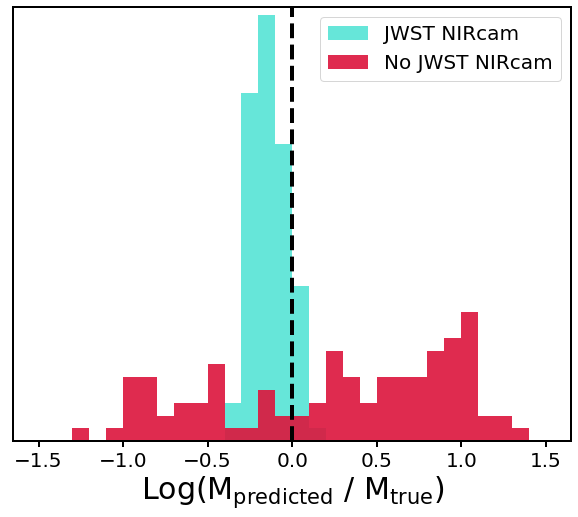

In [196]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', width=2, length=6, labelsize=20)
plt.tick_params(axis='both', which='minor', width=2, length=4)
n, bins, _ = plt.hist(np.log10(JWST_masses), bins = 30, range=(-1.5, 1.5), color='turquoise', alpha=0.8, lw=0.02, density=True, label='JWST NIRcam')
n, bins, _ = plt.hist(np.log10(no_masses), bins = 30, range=(-1.5, 1.5),color='crimson', alpha=0.9, lw=0.02, density=True, label='No JWST NIRcam')

plt.plot([0, 0], [0, 8], color='black', lw=4, ls='--')
plt.ylim([0, 3.4])
plt.yticks([])

plt.legend(loc='best', fontsize=20)

plt.xlabel('Log(M$_{\mathrm{predicted}}$ / M$_{\mathrm{true}}$)', fontsize=30)

plt.savefig('/Users/sidneylower/FINESST/pop_m_dist.png', dpi=300, bbox_inches='tight')

In [16]:
obs = np.load('/Users/sidneylower/ml_demo/SED_galaxy100_z2.npz')

In [17]:
obs_spec = obs['spec']
obs_wav = obs['wav']

In [18]:
residuals = (res['obs']['maggies'] - phot) / res['obs']['maggies']

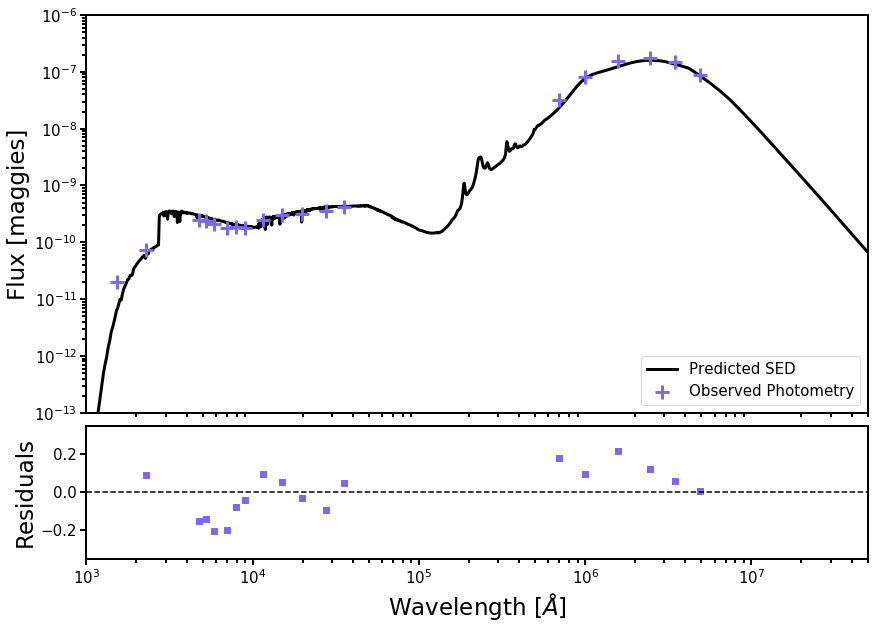

In [27]:
plt.rc('axes', linewidth=2)
fig = plt.figure(figsize=(14, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplots_adjust(wspace=0.04, hspace=0.05)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

for ax in [ax0, ax1]:
    ax.set_xlim([1e3, 5e7])
    ax.tick_params(axis='both', which='major', width=2, length=6, labelsize=15)
    ax.tick_params(axis='both', which='minor', width=2, length=4)

ax0.scatter(phot_wavelengths, res['obs']['maggies'], color='mediumslateblue', s=170, marker='+', lw=3, zorder=10, label='Observed Photometry')
#ax0.scatter(photno_wavelengths, resno['obs']['maggies'], color='darkorange', s=170, marker='+', lw=3, zorder=10, label='No JWST')

#ax0.plot(obs_wav, obs_spec, color='black', lw=2, label='True Spec')
#ax0.plot(spec_wavelengths, spec, color='mediumslateblue' , ls='--' ,lw=3, label='JWST SED')
ax0.plot(spec_wavelengths, specno, color='black' ,lw=3, label='Predicted SED')


#ax0.fill_betweenx([1e-7, 1e-2], x1=[phot_wavelengths[0] - 0.5*res['obs']['filters'][0].effective_width], 
#                      x2=[phot_wavelengths[0] + 0.5*res['obs']['filters'][0].effective_width], color='purple', alpha=0.4, label='GALEX FUV')



ax0.loglog()
ax0.set_ylim([1e-13, 1e-6])
ax0.set_ylabel('Flux [maggies]', fontsize=23)
ax0.set_xlabel('Wavelength [$\AA$]', fontsize=23)
ax0.get_xaxis().set_ticks([])
ax0.legend(loc='upper left', fontsize=15, frameon=False)

ax1.scatter(phot_wavelengths, residuals, color = 'mediumslateblue', marker='s')
#ax1.scatter(phot_wavelengths, residuals_c, color = 'crimson', marker='s', alpha=0.6)
ax1.plot([1e2, 1e8], [0.0,0.0], color='black', ls='--')
ax1.set_xscale('log')
ax1.set_ylim([-0.35, 0.35])
ax1.set_ylabel('Residuals', fontsize=23)
ax1.set_xlabel('Wavelength [$\AA$]', fontsize=23)

ax0.legend(loc='lower right', fontsize=15)
#ax0.set_title('Galaxy '+str(gal)+': M* ='+"{:.2e}".format(np.asarray(caesar_masses)[gal])+' M$_{\odot}$', fontsize=20)



plt.savefig('/Users/sidneylower/mock_SED.png', dpi=300, bbox_inches='tight')

In [2]:
glob_files2 = glob.glob('/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/prod_runs/tau/no_agb/*dust*.npz')

In [3]:
true_mass = []
prosp_mass = []
#stellar_mass = []
for i in tqdm.tqdm(glob_files2):
    dat = np.load(i, allow_pickle=True)
    true_mass.append(dat['true_mass'])
    prosp_mass.append(dat['prosp_mass'])
    #stellar_mass.append(np.log10(dat['stellar_mass']))

100%|██████████| 1579/1579 [03:47<00:00,  6.94it/s]


In [5]:
ml_dust = pd.read_csv('/Users/sidneylower/Downloads/dust_mass_simbapluseagle_z=0.csv')

In [8]:
ml_dust

,Unnamed: 0,true dust mass,pred dust mass
0,0,4.311677e+05,8.243793e+06
1,1,5.405981e+06,1.898724e+07
2,2,1.228712e+06,7.498326e+06
3,3,3.985470e+07,2.382647e+09
4,4,1.244003e+05,6.850268e+06
...,...,...,...
1792,1792,7.682620e-04,5.062018e+04
1793,1793,1.963331e+02,7.139673e+04
1794,1794,2.971988e+04,2.130072e+05
1795,1795,5.894375e+03,2.382803e+05


Text(0, 0.5, '$\\log(\\mathrm{M}_\\mathrm{dust, predicted}$ / $\\mathrm{M}_{\\odot}$)')

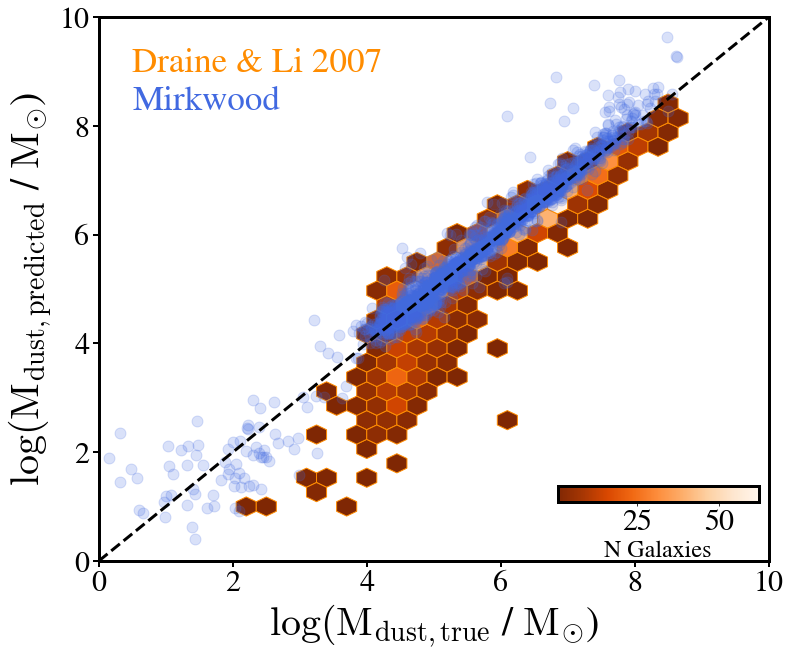

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('axes', linewidth=3)
ax.tick_params(axis='both', which='major', width=2, length=6)
ax.tick_params(axis='both', which='minor', width=2, length=4)
a = ax.hexbin(np.log10(true_mass), np.log10(prosp_mass), gridsize=30, extent=(1, 10, 1, 10), mincnt=1, edgecolor='darkorange', cmap = plt.cm.Oranges_r) 

cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower right', bbox_to_anchor=(0.,0.09,1,1), bbox_transform=ax.transAxes) 
cbar_a = fig.colorbar(a, cax=cbaxes, orientation='horizontal', label='N Galaxies')
cbar_a.set_label('N Galaxies', fontsize=24)


ax.plot([0, 10], [0, 10], color='black', lw=3, ls='--')
ax.scatter(np.log10(ml_dust['true dust mass'][:1700]), np.log10(ml_dust['pred dust mass'][:1700]), color='royalblue', s=120,alpha=0.2,label='Mirkwood')
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
ax.annotate('Draine & Li 2007', xy=(0.5, 9), fontsize=35, color='darkorange')
ax.annotate('Mirkwood', xy=(0.5, 8.3), fontsize=35, color='royalblue')
ax.set_xlabel('$\log(\mathrm{M}_\mathrm{dust, true}$ / $\mathrm{M}_{\odot}$)', fontsize=40)
ax.set_ylabel('$\log(\mathrm{M}_\mathrm{dust, predicted}$ / $\mathrm{M}_{\odot}$)', fontsize=40)

#plt.savefig('/Users/sidneylower/ml_scripts/prosp_mirk_dustmasses_updated.png', dpi=300, bbox_inches='tight')

In [29]:
len(10**ml_dust['log(dustmass)'])

1635

In [30]:
test = pd.read_pickle('/Users/sidneylower/ml_scripts/042020/ml_SEDs_z0.pkl')

In [31]:
test.keys()

Index(['ID', 'galex_FUV_err', 'galex_FUV', 'galex_FUV_err', 'galex_NUV',
       'galex_FUV_err_err', 'wfc3_uvis_f275w', 'galex_NUV_err',
       'wfc3_uvis_f336w', 'galex_FUV_err_err_err',
       ...
       'acs_wfc_f555w_err_err', 'herschel_spire_250', 'acs_wfc_f814w_err',
       'herschel_spire_350', 'sdss_u0_err_err_err_err', 'scuba_450',
       'panstarrs_ps1_z_err', 'herschel_spire_500', 'keck_lris_V_err_err',
       'scuba_850'],
      dtype='object', length=151)

In [32]:
len(test['ID'])

1635

In [33]:
len(true_mass)

1579

In [69]:
import yt

In [ ]:
ds = yt.load('/Volumes/')